<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
Exploratory data analysis
</div>

## Import libraries

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read data from file

In [186]:
student_df = pd.read_csv('../data/student_processed.csv')\
    
student_df.head(5)

,School,Sex,Age,Address,Family size,Parent's cohabitation status,Mother's education,Father's education,Mother's job,Father's job,...,Family relationships,Free time at school,Going out with friends,Workday alcohol consumption,Weekend alcohol consumption,Current health status,School absences,First period grade,Second period grade,Final grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Survey of alcohol consumption based on family relationships


## I will filter the needed columns from df and place them in a new DataFrame.



In [191]:
col_needed = ["School","Parent's cohabitation status", "Sex", "Age",                    
                     "In a romantic relationship","Family relationships", "Free time at school", "Going out with friends", 
                    "Workday alcohol consumption", "Weekend alcohol consumption",]

df = df[col_needed]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   School                        649 non-null    object
 1   Parent's cohabitation status  649 non-null    object
 2   Sex                           649 non-null    object
 3   Age                           649 non-null    int64 
 4   In a romantic relationship    649 non-null    object
 5   Family relationships          649 non-null    int64 
 6   Free time at school           649 non-null    int64 
 7   Going out with friends        649 non-null    int64 
 8   Workday alcohol consumption   649 non-null    int64 
 9   Weekend alcohol consumption   649 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 50.8+ KB


# Column with non-numeric dtype:

In [192]:
def calculate_distribution(series):
    value_counts = series.value_counts()
    return value_counts.to_dict()

agg_result = df.select_dtypes(exclude=['number']).agg(['nunique', calculate_distribution])

single_cate_profile = agg_result.transpose()

single_cate_profile.columns = ['num_diff_vals', 'distribution']

single_cate_profile = single_cate_profile.transpose()

single_cate_profile

,School,Parent's cohabitation status,Sex,In a romantic relationship
num_diff_vals,2,2,2,2
distribution,"{'GP': 423, 'MS': 226}","{'T': 569, 'A': 80}","{'F': 383, 'M': 266}","{'no': 410, 'yes': 239}"


In [221]:
col_needed = ["Parent's cohabitation status", 
              "Family relationships", "Workday alcohol consumption","Weekend alcohol consumption", "Going out with friends"]
grade_col = ["Workday alcohol consumption","Weekend alcohol consumption","Going out with friends"]

df_1 = df[col_needed]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Parent's cohabitation status  649 non-null    object
 1   Family relationships          649 non-null    int64 
 2   Workday alcohol consumption   649 non-null    int64 
 3   Weekend alcohol consumption   649 non-null    int64 
 4   Going out with friends        649 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 25.5+ KB


In [194]:
def mode(df: pd.DataFrame):
    mode = df.mode()
    return mode.loc[0]

PcoSta_df = df_1[["Parent's cohabitation status", 
                   "Family relationships","Workday alcohol consumption","Weekend alcohol consumption","Going out with friends"]]

In [216]:
## Parent's cohabitation status to Family relationships,Use alcohol

In [217]:
PcoSta_df_A = PcoSta_df[PcoSta_df["Parent's cohabitation status"] == 'A']
PcoSta_df_A_stat = PcoSta_df_A.select_dtypes(include=['number']).agg(['mean', mode])
PcoSta_df_T = PcoSta_df[PcoSta_df["Parent's cohabitation status"] == 'T']
PcoSta_df_T_stat = PcoSta_df_T.select_dtypes(include=['number']).agg(['mean', mode])

In [218]:
PcoSta_df_A_stat 

,Family relationships,Workday alcohol consumption,Weekend alcohol consumption,Going out with friends
mean,3.8,1.4,2.0375,3.0875
mode,4.0,1.0,1.0000,3.0000


In [219]:
PcoSta_df_T_stat

,Family relationships,Workday alcohol consumption,Weekend alcohol consumption,Going out with friends
mean,3.949033,1.516696,2.314587,3.198594
mode,4.000000,1.000000,1.000000,3.000000


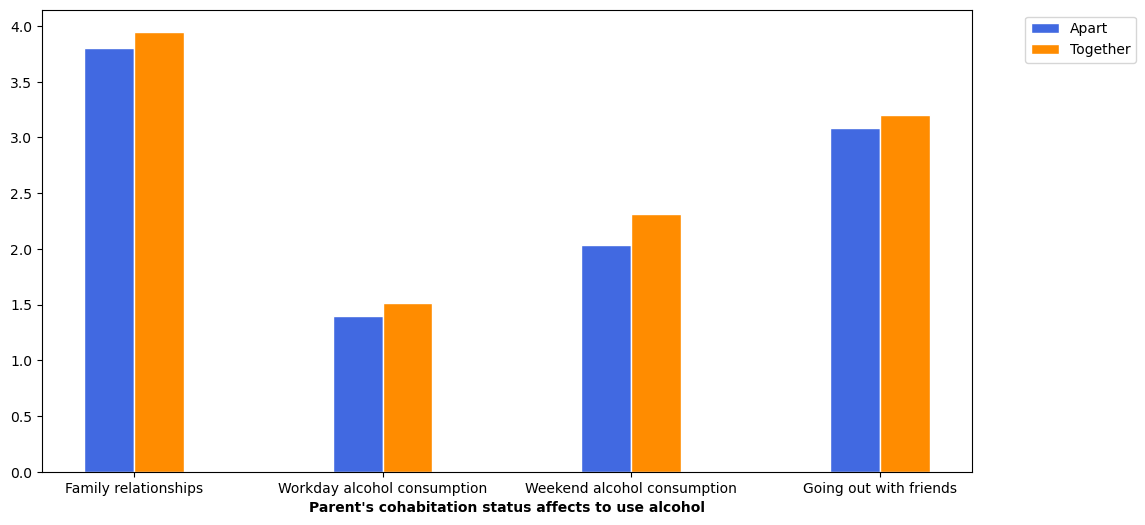

In [224]:
# Mean
fig, ax = plt.subplots()
barWidth = 0.2

r1 = np.arange(len(PcoSta_df_A_stat.loc['mean']))
r2 = [x + barWidth for x in r1]

ax.bar(r1, PcoSta_df_A_stat.loc['mean'].values, color='royalblue', 
       width=barWidth, edgecolor='white', 
       label="Apart")
ax.bar(r2, PcoSta_df_T_stat.loc['mean'].values, color='darkorange', 
       width=barWidth, edgecolor='white', 
       label="Together")

plt.xlabel("Parent's cohabitation status affects to use alcohol", fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(4)], 
           PcoSta_df_A_stat.columns.tolist())

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.set_size_inches(12, 6)
plt.show()

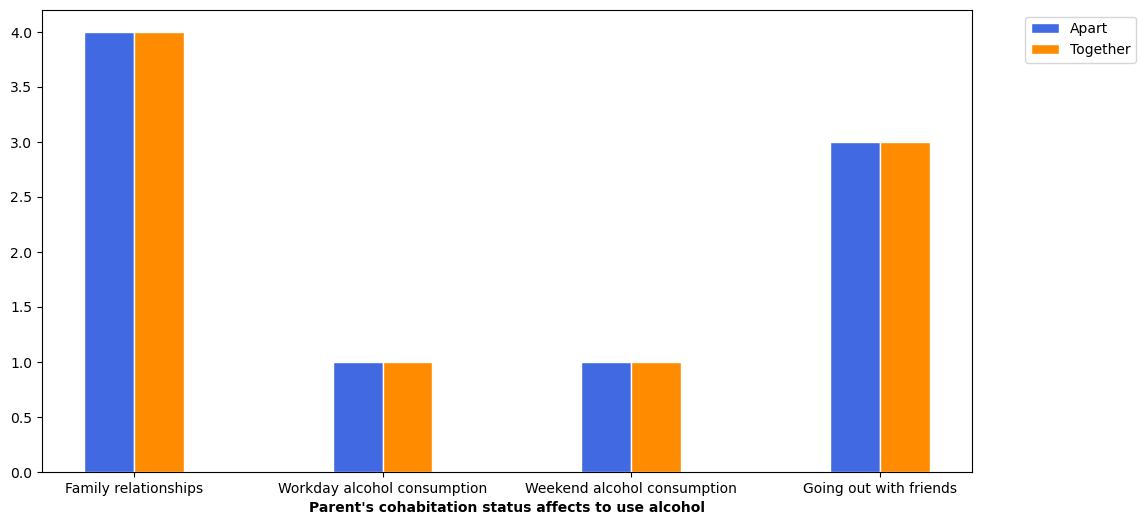

In [225]:
# Mode
fig, ax = plt.subplots()
barWidth = 0.2

r1 = np.arange(len(PcoSta_df_A_stat.loc['mode']))
r2 = [x + barWidth for x in r1]

ax.bar(r1, PcoSta_df_A_stat.loc['mode'].values, color='royalblue', 
       width=barWidth, edgecolor='white', 
       label="Apart")
ax.bar(r2, PcoSta_df_T_stat.loc['mode'].values, color='darkorange', 
       width=barWidth, edgecolor='white', 
       label="Together")

plt.xlabel("Parent's cohabitation status affects to use alcohol", fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(4)], 
           PcoSta_df_A_stat.columns.tolist())

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.set_size_inches(12, 6)
plt.show()

### From the graph above, we can see that children living with their parents have a better relationship and consume more alcohol (may be with friends)

## More specific 

Survey children who have bad relationships with their families

In [232]:
bad_relate_A = df_1[(Q3_df["Parent's cohabitation status"] == 'A')& (Q3_df["Family relationships"] <3) ]
bad_relate_B = df_1[(Q3_df["Parent's cohabitation status"] == 'T')& (Q3_df["Family relationships"] <3) ]
list_bad=[bad_relate_A,bad_relate_B]

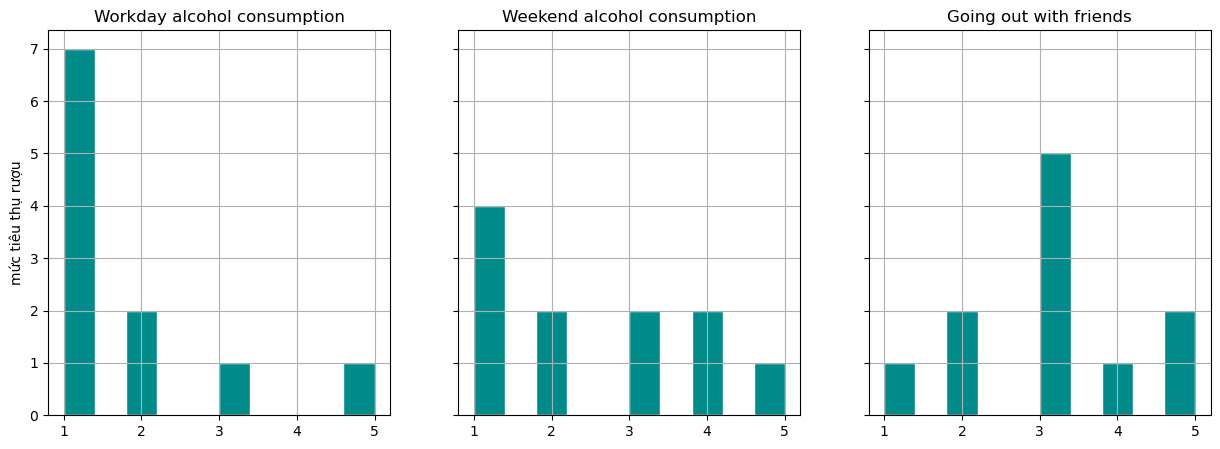

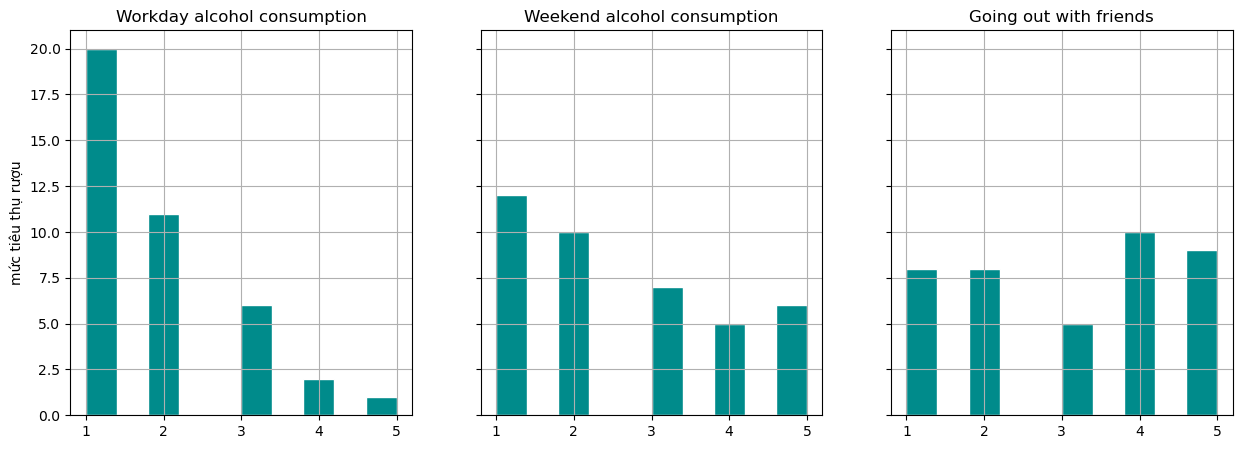

In [233]:
for temp in list_bad:
    
    temp[grade_col].plot(kind = 'hist', 
                            subplots = True,
                            ylabel = 'mức tiêu thụ rượu',
                            layout = (1, 3), 
                            figsize = (15, 5), 
                            bins = 10, 
                            grid = True,
                            sharey=True, 
                            sharex=False,
                            title = grade_col,
                            legend = False,
                            color =  "darkcyan",
                            edgecolor = 'white')

plt.show()

Some children have bad relationships with their have alcohol consumption more than at the weekend

In [204]:
well_relate_A = Q3_df[(Q3_df["Parent's cohabitation status"] == 'A')& (Q3_df["Family relationships"] >3) ]
well_relate_B = Q3_df[(Q3_df["Parent's cohabitation status"] == 'T')& (Q3_df["Family relationships"] >3) ]
list_well=[well_relate_A,well_relate_B]

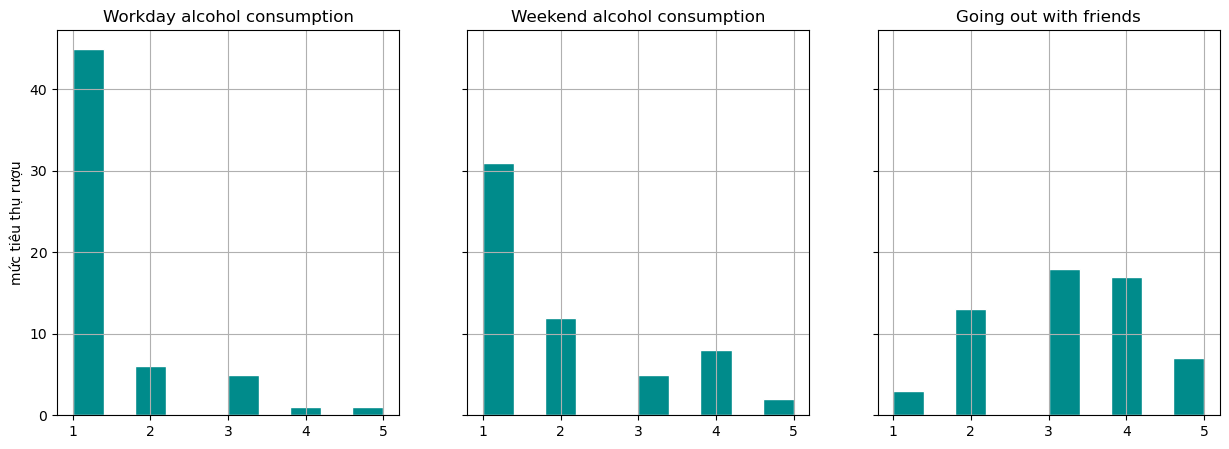

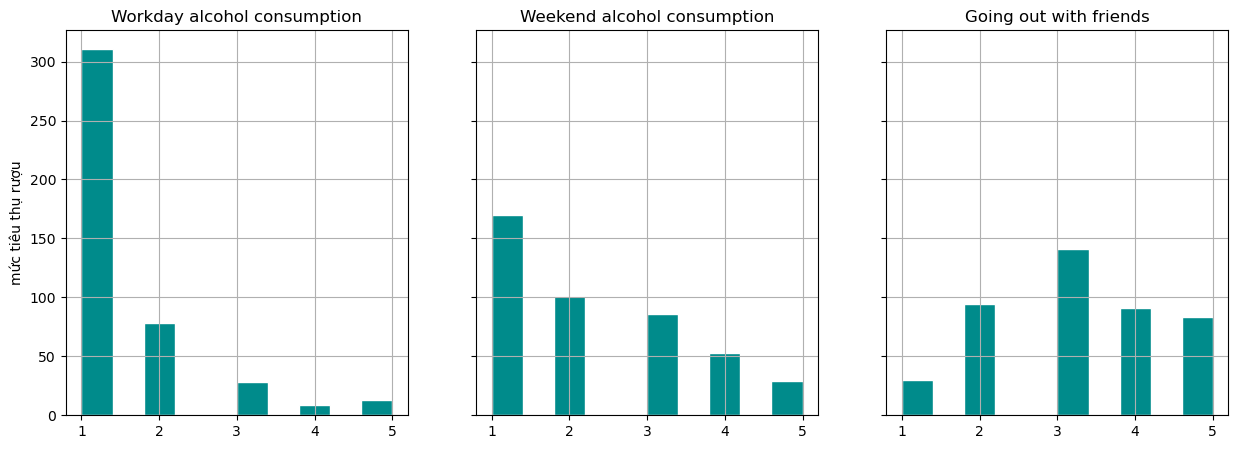

In [205]:
for temp in list_well:
    
    temp[grade_col].plot(kind = 'hist', 
                            subplots = True,
                            ylabel = 'mức tiêu thụ rượu',
                            layout = (1, 3), 
                            figsize = (15, 5), 
                            bins = 10, 
                            grid = True,
                            sharey=True, 
                            sharex=False,
                            title = grade_col,
                            legend = False,
                            color =  "darkcyan",
                            edgecolor = 'white')

plt.show()

The proportion of people who regularly use alcohol is low compared to those who dont use